# Exercise Set 12: Peer effects 


In this Exercise Set 12 we will investigate peer effects data. 

## 12.1: roommate peer effects


<br>
<br>

We use a simlated dataset which will give results that provide conclusions similar to Sacerdote (2000). 

### Data structuring 

Our data set does not contain a network but has an implicit one associated. We assume there is an edge between all room mates. 

> **Ex. 12.1.1:** Create a column called `person_other` with identity of the other person in room.
>> *Hint:* You can get the unique people in the room by using `df.groupby('room').person.unique()`.

In [1]:
import pandas as pd
df = pd.read_csv('Peer_effects_room.csv')
df.head()

,person,room,high_school_GPA,college_GPA
0,0,351,-1.715472,-1.285307
1,1,738,-0.530190,-0.031833
2,2,247,-0.589543,-0.203230
3,3,751,-1.303115,0.982488
4,4,698,0.156678,-0.371632


In [2]:
# finding who is sharing room, since there is one two people in each room, we can use min. and max.
df2 = df.groupby('room').person.agg(['min', 'max']).rename(columns = {'min': 'person', 'max':'person_other'})

# adding information to original dataset
df_alpha = df.merge(df2, how = 'right', on = 'person')
df_alpha.sort_values('room')

# since 'person a' is a roomate with 'person b', and 'person b' is roommate with 'person a', we make another list.
df3 = df2.rename(columns = {'person': 'person_other', 'person_other': 'person'})
df_beta = df.merge(df3, how = 'right', on  = 'person')

# print(df_beta.sort_values('room').head())
# print(df_alpha.sort_values('room').head())

# concatenating the two lists
df_4 = pd.concat([df_alpha, df_beta], ignore_index = True)
df_4.sort_values('room').head(10)

,person,room,high_school_GPA,college_GPA,person_other
1773,1757,0,-0.181905,0.566177,1603
967,1603,0,-0.622770,0.540078,1757
410,466,1,-2.248266,-3.596904,1649
1673,1649,1,0.378918,0.033256,466
1929,1929,2,-0.095399,-0.052611,816
643,816,2,-0.798128,-1.811919,1929
423,481,3,-1.094094,-2.096950,1719
1737,1719,3,1.885767,-1.104111,481
1888,1887,4,-2.513904,0.225987,1108
789,1108,4,0.977881,0.880004,1887


<br>

> **Ex. 12.1.2:** Add information on the roommate GPA in high school and college.
>> *Hint:* This can be done merging on `person_other`.

In [5]:
#inserting data in person_y from previous data set 
df_5 = df_4.copy()
df_5 = df_5[['person', 'high_school_GPA', 'college_GPA']]
df_5 = df_5.rename(columns = {'person': 'person_other'})
df_6 = df_4.merge(df_5, on = 'person_other')

#renaming person to person_x, and person_other to person_y
df_6.rename(columns = {'person': 'person_x','person_other': 'person_y'})
df_6.head(5)

,person,room,high_school_GPA_x,college_GPA_x,person_other,high_school_GPA_y,college_GPA_y
0,0,351,-1.715472,-1.285307,1645,-0.818594,-0.434847
1,1,738,-0.530190,-0.031833,1039,-0.493444,0.299729
2,2,247,-0.589543,-0.203230,944,1.281112,-0.479543
3,3,751,-1.303115,0.982488,1099,-1.812137,-2.267394
4,4,698,0.156678,-0.371632,1708,-0.327219,0.670683


<br>
<br>

### Data exploration and randomization

We now have our final dataset and can begin investigating how the raw data looks. 

> **Ex. 12.1.3:** plot own GPA in high school vs college in a scatter plot.

Text(0, 0.5, 'college GPA')

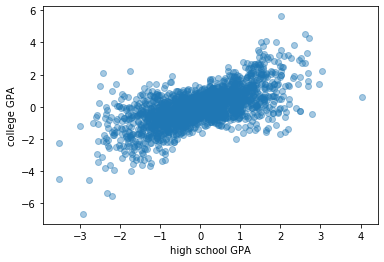

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df_6['high_school_GPA_x'], df_6['college_GPA_x' ], alpha = 0.4)
plt.xlabel('high school GPA')
plt.ylabel('college GPA')


<br>
We want to check there is random assignment of roommates. 

> **Ex. 12.1.4:** Plot high school GPA vs roommate's high school GPA. Comment on the output. Run a regresion of high school GPA on roommate's high school GPA to formally check random assignment.
>
>> *Hint*: To run regressions in python, you can use the `statsmodels` package. Look up it's documentation and use the `.formula` api to estimate your model. To see a summary of a fitted model you can call `.summary()` on the object. 
>
>> *Hint:* Under random assignment we would expect there to be no relation between the high school GPA's of roommates. Why is this? 

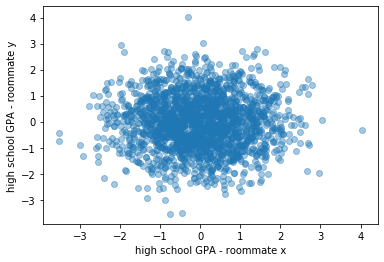

In [12]:
plt.scatter(df_6['high_school_GPA_x'], df_6['high_school_GPA_y'], alpha = 0.4)
plt.xlabel('high school GPA - roommate x')
plt.ylabel('high school GPA - roommate y')
plt.show()

In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols(formula = 'high_school_GPA_x ~ high_school_GPA_y', data = df_6)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      high_school_GPA_x   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07263
Date:                Thu, 21 May 2020   Prob (F-statistic):              0.788
Time:                        16:42:32   Log-Likelihood:                -2883.6
No. Observations:                2000   AIC:                             5771.
Df Residuals:                    1998   BIC:                             5782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0284      0.023     -1.241      0.215      -0.073       0.016
high_school_GPA_y    -0.0060      0.022     -0.269      0.788      -0.050       0.038
==============================================================================
Omnibus:                        0.231   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.288
Skew:                           0.015   Prob(JB):                        0.866
Kurtosis:                       2.949   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From the p-value, we can see that there is no relation between.

<br>
<br>

## Roommate effect

Having checked the data we move on to analyzing peer effects. We begin with analyzing **exogenous** peer effects. I.e. peer effects that are related to the ex ante characteristics of the roommate.

> **Ex. 12.1.5:** Plot own GPA in college vs. roommate GPA in high school. Comment on the output. Test whether there is an impact using a regresion of college school GPA on high school GPA for the person itself and its roommate.

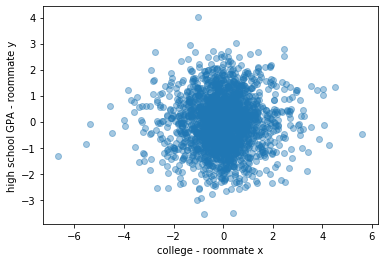

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      high_school_GPA_x   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.743
Date:                Thu, 21 May 2020   Prob (F-statistic):              0.175
Time:                        17:14:13   Log-Likelihood:                -2881.9
No. Observations:                2000   AIC:                             5770.
Df Residuals:                    1997   BIC:                             5787.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0273      0.023     -1.192      0.233      -0.072       0.018
high_school_GPA_y    -0.0398      0.029     -1.378      0.168      -0.096       0.017
college_GPA_y         0.0479      0.026      1.847      0.065      -0.003       0.099
==============================================================================
Omnibus:                        0.174   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.917   Jarque-Bera (JB):                0.223
Skew:                           0.015   Prob(JB):                        0.895
Kurtosis:                       2.959   Cond. No.                         2.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
plt.scatter(df_6['college_GPA_x'], df_6['high_school_GPA_y'], alpha = 0.4)
plt.xlabel('college - roommate x')
plt.ylabel('high school GPA - roommate y')
plt.show()



mod = smf.ols(formula = 'high_school_GPA_x ~ high_school_GPA_y + college_GPA_y', data = df_6)
res = mod.fit()
res.summary()

### Once againg we see that there is no relation betweeen the end. and ex. variable 

We now move on to analyze **endogenous** peer effects.

> **Ex. 12.1.6:** Test whether there is an association between own college GPA and roommates. Do this by running a regresion of college school GPA on high school GPA for the person itself and its roommate. Comment on the output.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          college_GPA_x   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     671.3
Date:                Thu, 21 May 2020   Prob (F-statistic):          1.03e-223
Time:                        17:14:50   Log-Likelihood:                -2586.0
No. Observations:                2000   AIC:                             5178.
Df Residuals:                    1997   BIC:                             5195.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0226      0.020     -1.147      0.252      -0.061       0.016
high_school_GPA_y     0.0356      0.019      1.847      0.065      -0.002       0.073
high_school_GPA_x     0.7059      0.019     36.606      0.000       0.668       0.744
==============================================================================
Omnibus:                       77.587   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.025
Skew:                          -0.117   Prob(JB):                     5.52e-47
Kurtosis:                       4.582   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

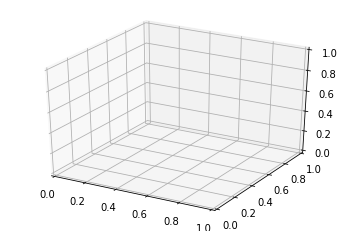

In [65]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df_6['high_school_GPA_x']
y = df_6['high_school_GPA_y']
z = df_6['college_GPA_x']

#Axes3D.scatter(xs = x, ys = y, zs = z)

mod = smf.ols(formula = 'college_GPA_x ~ high_school_GPA_y + high_school_GPA_x', data = df_6)
res = mod.fit()
res.summary()

<br>
<br>

# 12.2 Peer effects in Danish classrooms

Read the [report by Kraka on peer effects in Danish schools](http://kraka.dk/sites/default/files/public/baggrundsnotat_klassekammerateffekter_0.pdf) from 2019. If you do not speak Danish talk to your group about the content.
> **Ex. 12.2.1:** Explain the identification strategy in words.

> **Ex. 12.2.2:** Are there any shortcomings of the identification strategy? What does the seminal paper [Hoxby (2000)](https://www.nber.org/papers/w78612.pdf) test for?

> **Ex. 12.2.3:** Try to come up with identification strategies for identifying peer effects in the context of Danish class rooms.